In [23]:
#use case: we are to predict the price of the car based on various factors such as of the price of Toyota Coralla Compny with optimal Models usinng machine learning algorithms

#steps followed:
#step1- data import using pandas
#step2- EDA 1 process
#step3- data conversion of categorical data to numerical using dictionary method
#step4- data segregation or division for train and test split
#step5- EDA 2 different model implementation (supervised machine learning algorithms)
#step6- accuracy check using r2_score and accuracy score
#step7- Inference
#Step8- Interview Questions

In [24]:
#step1- data import using pandas
import pandas as pd
df=pd.read_csv(r"/content/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [25]:
#step2- EDA 1 process
df.shape

(1436, 11)

In [26]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [27]:
print(df['Fuel_Type'].unique())


['Diesel' 'Petrol' 'CNG']


In [28]:
#step3- data conversion of categorical data to numerical using dictionary method
fuel_map = {
    'Petrol': 0,
    'Diesel': 1,
    'CNG': 2,
    }
df['Fuel_Type'] = df['Fuel_Type'].map(fuel_map)


In [29]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,0,86,0,1300,3,4,5,1025
1432,10845,72,19000,0,86,0,1300,3,4,5,1015
1433,8500,71,17016,0,86,0,1300,3,4,5,1015
1434,7250,70,16916,0,86,0,1300,3,4,5,1015


In [30]:
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,0.131616,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,0.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,0.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [31]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [33]:
z=df.corr(numeric_only=True)

In [34]:
z


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,0.022157,-0.080261,0.420586,1.000000,-0.409476,-0.069718,0.277239,0.026935,NaN,-0.069655,0.505303
HP,0.314990,-0.156622,-0.333538,-0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,-0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,-0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


<Axes: >

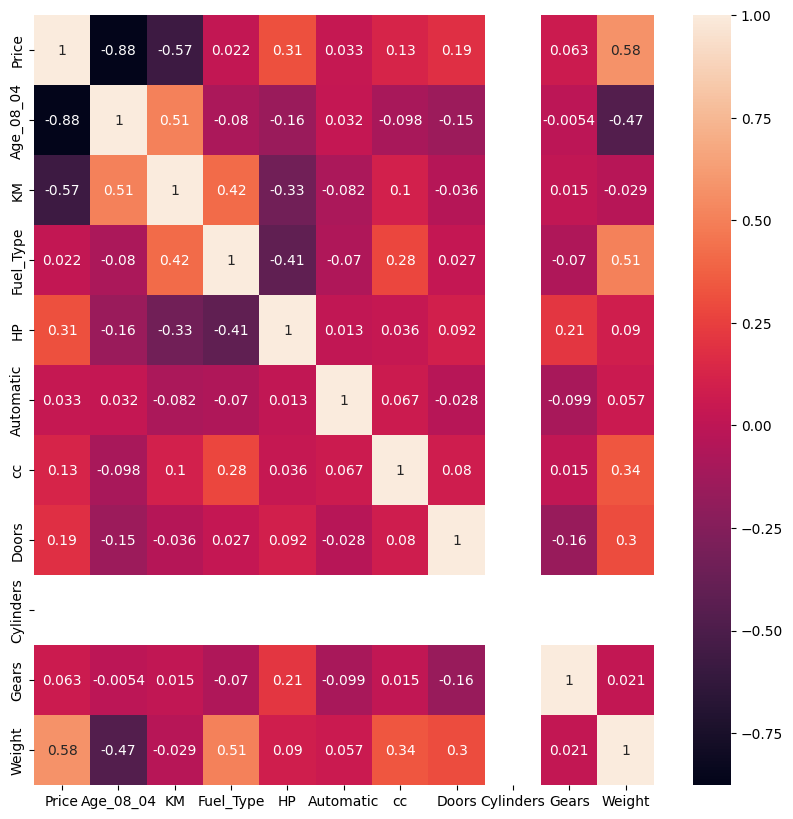

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(z, annot=True)  #correlation map using heatmap

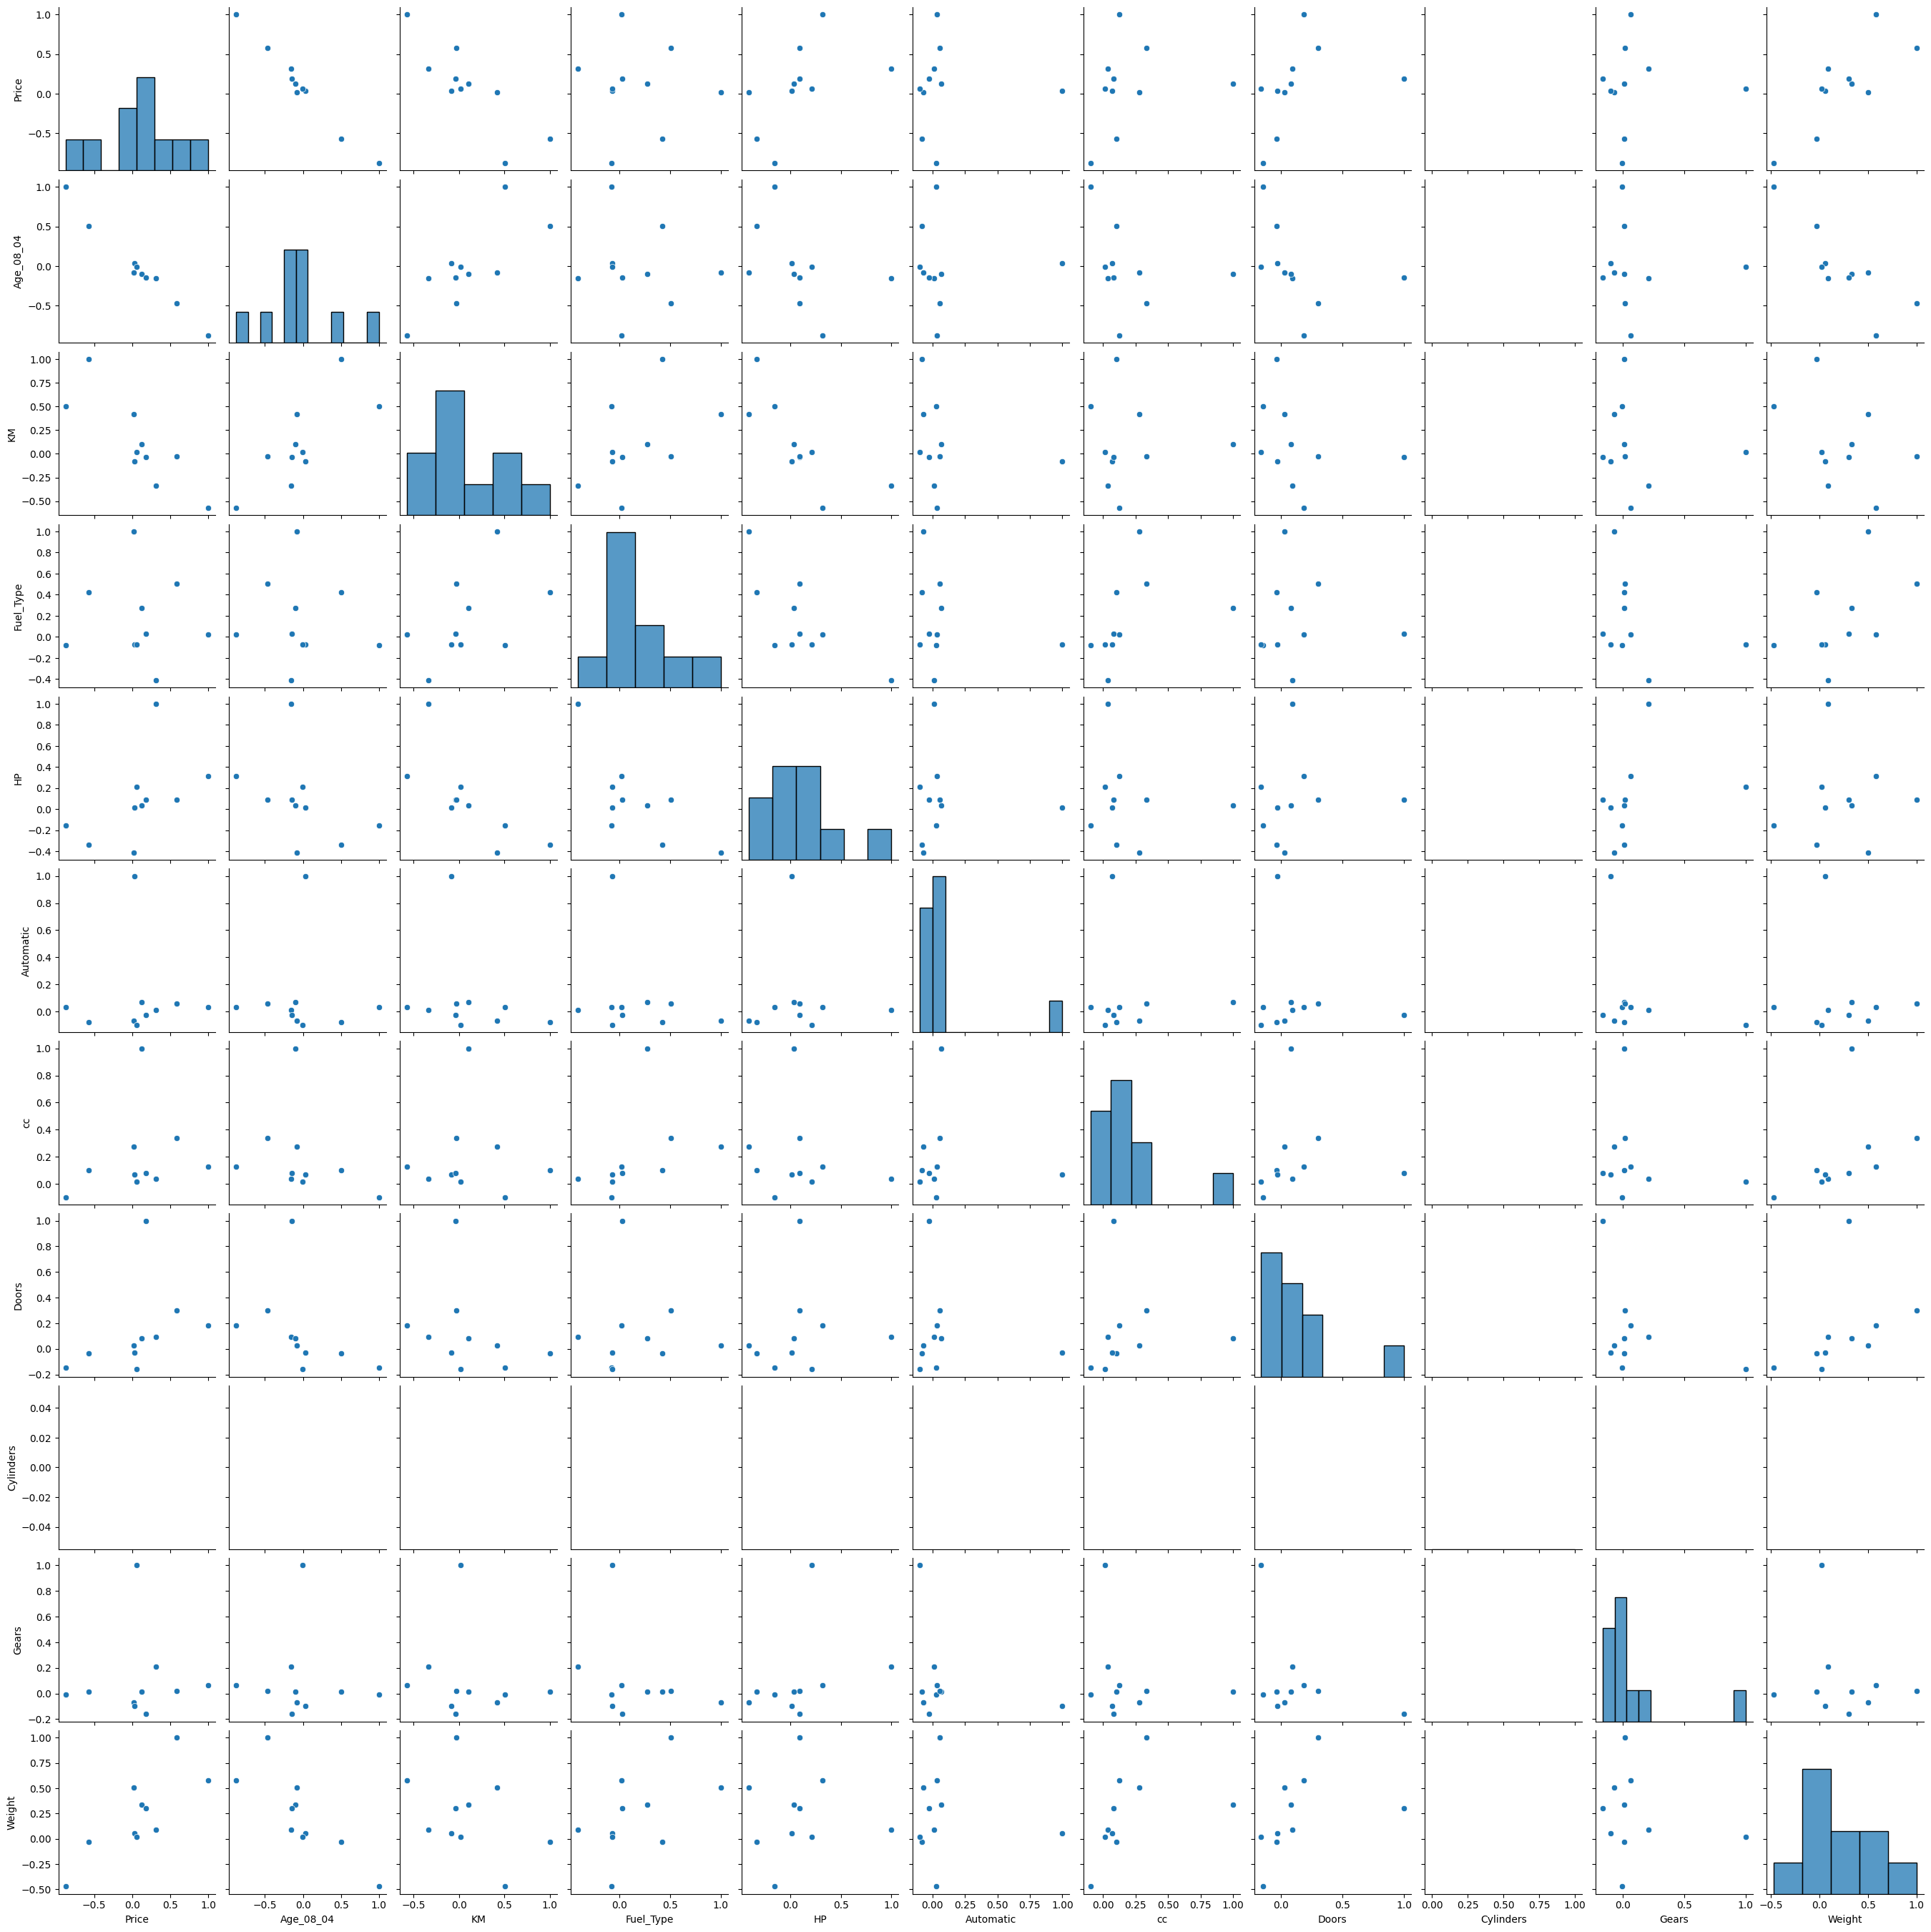

In [36]:
sns.pairplot(z) #pairplot which is a combination of scatterplot and histogram

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>,
        <Axes: title={'center': 'Fuel_Type'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

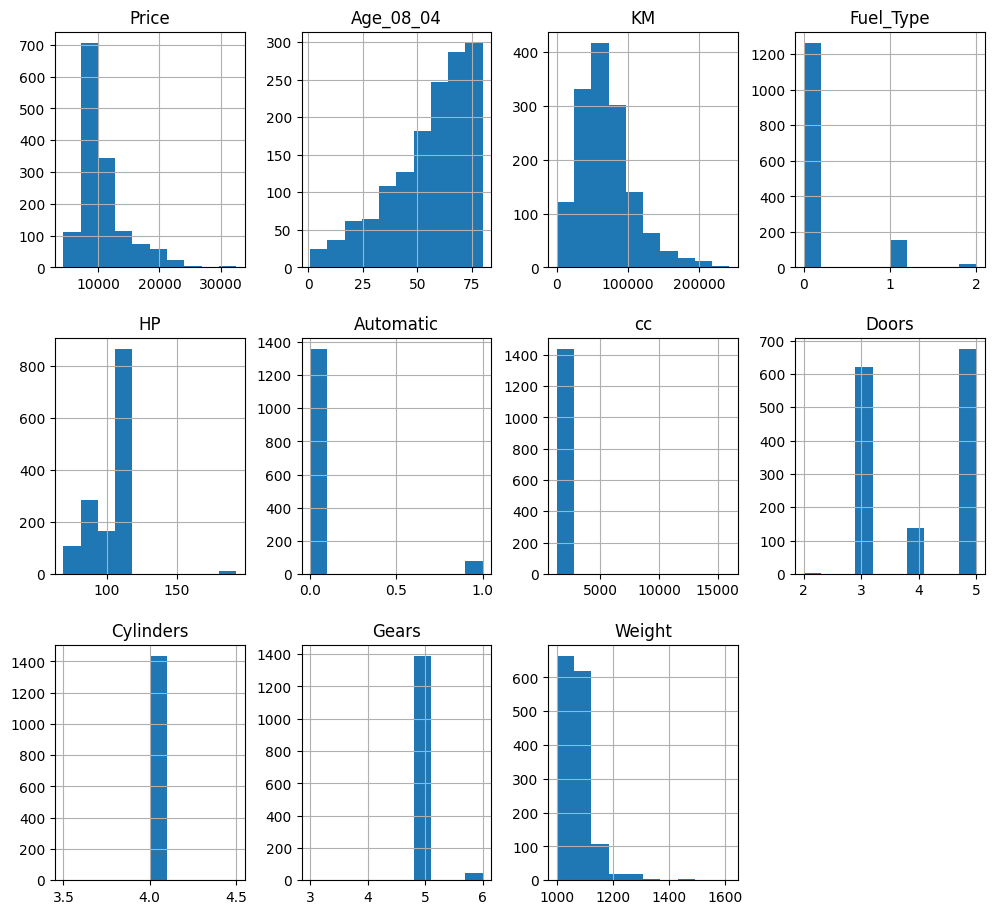

In [37]:
df.hist(figsize=(12,15),layout=(4,4))

In [38]:
df=df.drop('Cylinders',axis=1)


In [39]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,0,86,0,1300,3,5,1025
1432,10845,72,19000,0,86,0,1300,3,5,1015
1433,8500,71,17016,0,86,0,1300,3,5,1015
1434,7250,70,16916,0,86,0,1300,3,5,1015


In [40]:
x=df.iloc[:,1:] # division of data into train and test split

In [41]:
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,1,90,0,2000,3,5,1165
1,23,72937,1,90,0,2000,3,5,1165
2,24,41711,1,90,0,2000,3,5,1165
3,26,48000,1,90,0,2000,3,5,1165
4,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,0,86,0,1300,3,5,1025
1432,72,19000,0,86,0,1300,3,5,1015
1433,71,17016,0,86,0,1300,3,5,1015
1434,70,16916,0,86,0,1300,3,5,1015


In [42]:
y=df.Price
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [43]:
from sklearn.model_selection import train_test_split # train test split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=23)

In [45]:
x_train

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
755,62,80265,0,86,0,1300,3,5,1015
428,50,83567,0,110,0,1600,5,5,1075
789,62,75000,0,110,0,1600,5,5,1070
804,64,73300,0,86,0,1300,3,5,1015
1050,69,197501,1,72,0,2000,5,5,1135
...,...,...,...,...,...,...,...,...,...
31,22,35199,0,97,0,1400,3,5,1100
950,67,52800,0,86,0,1300,3,5,1015
1064,74,159908,0,110,0,1600,3,5,1050
742,58,82254,0,110,0,1600,5,5,1050


MULTI LINEAR REGRESSION

In [46]:
x_test

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
783,65,76155,0,110,0,1600,4,5,1035
925,59,56259,0,86,0,1300,3,5,1015
1338,80,63500,0,110,0,1600,3,5,1050
2,24,41711,1,90,0,2000,3,5,1165
1198,75,89507,0,86,0,1300,3,5,1015
...,...,...,...,...,...,...,...,...,...
1136,77,105152,0,86,0,1300,3,5,1015
1164,73,97494,0,110,0,1600,5,5,1085
1261,77,75799,0,110,0,1600,3,5,1050
112,8,13253,1,116,0,2000,5,5,1320


In [47]:
y_train

,Price
755,8750
428,10500
789,8950
804,8900
1050,8500
...,...
31,15750
950,8450
1064,5740
742,9750


In [48]:
y_test

,Price
783,8990
925,8950
1338,7499
2,13950
1198,7450
...,...
1136,6750
1164,8950
1261,9500
112,24950


In [49]:
from sklearn.linear_model import LinearRegression # multiple linear regression build

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(x_train,y_train)   #model fitting

LinearRegression()

In [52]:
y_predict=lr.predict(x_train)

In [53]:
y_predict

array([ 8258.96918944, 11458.94686582, 10022.98289693, ...,
        6622.7152618 ,  9984.3746427 , 10606.58484186])

In [54]:
from sklearn.metrics import r2_score

In [55]:
score_train=r2_score(y_train,y_predict)
score_train                               # training accuracy of 86 percentage which is an excellent model

0.8627328849418889

In [56]:
lr1=LinearRegression()

In [57]:
lr1.fit(x_test,y_test)

LinearRegression()

In [58]:
y_predict1=lr.predict(x_test)

In [59]:
y_predict1

array([ 8950.0920752 ,  9072.59405506,  7645.61869523, 16403.95844347,
        6472.57813665, 10687.05068333, 10718.83257583,  7654.12595522,
       11179.75290334, 14247.66855722,  9476.50770831, 10228.98983046,
       10942.55156364, 10375.96918043, 12018.56660677,  8941.41156909,
        7649.39157275,  5303.19071874,  9841.12237102, 17249.29277003,
       17541.45915881,  8491.51454103, 12364.55302576,  6433.84380275,
        8874.57003219,  9679.55759685, 10929.5418247 ,  8271.23716056,
        8755.66634923,  8706.39143745, 11890.92237954,  8058.48421941,
        9381.69317151,  8477.43000072, 10078.30159251,  9411.77576756,
       14140.28352983,  7645.05293911, 11930.45986615,  9607.99770624,
        8596.98735328,  9762.53059033, 10547.7761729 , 10394.48563997,
        9678.59292332,  6630.98693313,  8380.12560507,  8426.49134405,
        7957.23230117,  6876.79488722,  9441.05226949, 16539.49313847,
        7925.25001034, 11287.7573116 ,  8548.72549097,  9828.78875233,
      

In [60]:
score_test=r2_score(y_test,y_predict1)
score_test                              #result of multi linear regression test score with r2_score of 87% which is an excellent model

0.8728197599216645

K NEAREST NEIGHBOR ALGORITHM

In [61]:
from sklearn.neighbors import KNeighborsClassifier


In [62]:
knn=KNeighborsClassifier(n_neighbors=5)

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
knn_pred_train=knn.predict(x_train)

In [65]:
print(knn_pred_train)

[ 9950  6750  7600 ...  4350  7495 10500]


In [66]:
knn_pred_test=knn.predict(x_test)

In [67]:
knn_pred_test

array([ 7950,  7750,  8750, 12950, 11500,  8900,  6950,  9250,  8950,
       10450,  6250,  9950,  8250,  8900,  7400,  6500,  9250,  4450,
        7500, 19950,  8750,  8950,  8750,  7950,  9450,  7500,  7950,
        6495,  7600,  9950, 12950,  7950,  9950,  8250,  8950,  9450,
       19750,  8250,  7950,  7995,  8250, 11750,  8950,  9950,  7950,
        6500,  7750,  8500,  6640,  6500,  9950,  9950,  6500,  5950,
        9450,  8950,  7950,  7250,  7250,  7500, 11750,  8900, 10950,
       19950,  7600,  7500,  8900,  8500,  7450,  8950,  9950,  7200,
        6500,  8900,  9950,  8000,  9950, 12950, 10000, 17795,  8500,
        8950,  7950,  7495,  9250,  9250,  9500,  5150,  8950,  7600,
        9950,  5950,  8900,  7500,  8000,  7500,  6450,  8250,  9950,
        9950,  5250, 13750,  9750, 16250,  6495,  8250,  7400,  9950,
        7750,  8495,  6425,  6750,  8950,  7995,  8900,  9950,  6500,
        9500,  8450,  7750, 11950,  9940,  6750, 12695,  7495,  5150,
        6750,  8500,

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_train,knn_pred_train) #training accuracy of 25% which is a very bad model to implement

0.25

In [70]:
accuracy_score(y_test,knn_pred_test) #testing accuracy of 1% which is a very bad model to implement

0.010416666666666666

LASSO AND RIDGE

In [71]:
from sklearn.linear_model import Lasso,Ridge

In [72]:
lasso=Lasso(alpha=4) #ALPHA VALUE 4

In [73]:
lasso.fit(x_train,y_train)  #model fitting

Lasso(alpha=4)

In [74]:
lasso_pred_train=lasso.predict(x_train)

In [75]:
lasso_pred_train

array([ 8251.47626046, 11461.1265775 , 10032.28106976, ...,
        6614.26673598,  9994.25074806, 10622.70351188])

In [76]:
r2_score(y_train,lasso_pred_train) #training r2_score of 86% which is also an excellent algorithm to implement

0.8626495272220192

In [77]:
lasso_pred_test=lasso.predict(x_test)

In [78]:
lasso_pred_test

array([ 8965.57124717,  9070.66954895,  7665.29693462, 16439.14993623,
        6466.72439686, 10686.15469613, 10836.72605262,  7662.91965346,
       11169.77183862, 14258.73526469,  9482.23418609, 10243.70281012,
       10945.72845969, 10388.04760008, 12022.55150282,  9076.95521881,
        7658.11512827,  5289.60891229,  9851.76263216, 17254.59281798,
       17536.328269  ,  8508.1032244 , 12377.70037965,  6427.21547291,
        8871.67293636,  9613.27945736, 10854.75523443,  8270.41190716,
        8767.52070935,  8724.74595631, 11892.57652015,  8072.98124396,
        9398.98675142,  8491.07307193, 10097.92968876,  9347.59352791,
       14158.40715458,  7652.24617228, 11860.17766966,  9622.15820553,
        8618.04493041,  9757.08038584, 10889.82618901, 10413.61179457,
        9687.74512261,  6772.02775875,  8377.19324404,  8438.77613834,
        7962.06952864,  6882.63308311,  9442.18558423, 16537.73857126,
        7926.38825785, 11293.59918118,  8564.74409413,  9846.2204036 ,
      

In [79]:
r2_score(y_test,lasso_pred_test) #testing r2_score of 87% which is also an excellent algorithm to implement

0.8715506020896193

In [80]:
ridge=Ridge(alpha=6)

In [81]:
ridge.fit(x_train,y_train)

Ridge(alpha=6)

In [82]:
rid_pred_train=ridge.predict(x_train)

In [83]:
rid_pred_train

array([ 8256.57886129, 11458.35009925, 10025.24018222, ...,
        6622.45732211,  9986.98813422, 10615.28458237])

In [84]:
r2_score(y_train,rid_pred_train)

0.862712829131847

In [85]:
rid_pred_test=ridge.predict(x_test)
rid_pred_test

array([ 8957.45267249,  9072.53782886,  7656.95079769, 16423.81372488,
        6470.74378352, 10685.11333141, 10775.43443417,  7656.02323521,
       11177.79639846, 14250.89337938,  9482.24212249, 10238.45481303,
       10942.3299322 , 10379.35792866, 12018.74566323,  9007.80066472,
        7651.25980809,  5293.26046906,  9843.88727401, 17255.02026022,
       17538.01699155,  8496.62922752, 12368.47795257,  6426.7137252 ,
        8869.12664948,  9657.50600034, 10899.01018486,  8271.57944477,
        8758.85842898,  8714.91432252, 11888.71167202,  8062.71390431,
        9392.16061519,  8481.27596674, 10084.88617868,  9385.87857144,
       14146.39269671,  7648.63995569, 11907.2527638 ,  9617.19613995,
        8606.61062955,  9756.03768202, 10740.06288984, 10400.79359935,
        9680.40865936,  6701.88250749,  8377.17414063,  8432.21500404,
        7962.50404972,  6882.3763355 ,  9442.56699069, 16542.19289761,
        7923.93687761, 11288.61941083,  8556.28112185,  9839.34170215,
      

In [86]:
r2_score(y_test,rid_pred_test) #ridge result for test of 87% which is an excellent model

0.8721980121901605

In [87]:
#step7- Inference

#we can see that multi linear regression supervised machine learning algorithm is an excellent model to deploy for the data set Toytota Corolla

In [88]:
#Normalization is the process of dropping the values to the range of 0 to 1. This helps the user to interpret and process easily and fit the model with highest accuracy. It is usualy done using the formula x-x(min) / x(max)-x where x is the observation and x(min) nad x(max) atre the minimum and maximum of the observations.

#Standardization centers the data around the mean with a standard deviation of 1. It transforms data into a distribution with mean 0 and standard deviation 1. the forula is x-mu/sigma whre x is the observation, mu is the mena of the observations and sigma is the standard deviation

In [89]:
#lasso and ridge helps the user to address multicollinearity in MLR. They can also use Principle component analysis to addrtess multicollinearity in the same model.